In [25]:
% matplotlib inline

In [26]:
from fenics import *

In [27]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [28]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

\Why don't these show? This is copied verbatim from the tutorial:

**EDIT 1**: importing * from dolfin and commenting out fenics at top resulted in an error; afterwards, commenting out the dolfin import and uncommenting the fenics import, THEN rerunning all lines top to bottom finally resulted in displaying the plots below. I'll test if this works on terminal. 

**EDIT 2**: No joy.

**EDIT 3**: It must have something to do with matplotlib. Running `%matplotlib inline` and `%load ft01_poisson.py` in two lines in a new JNB results in the below plots overlaid on each other.

**EDIT 4**: Restarting the kernel and rerunning `ft01_poisson.py` via steps in EDIT 3, but without the line: `from dolfin import *` results in [a warning about matplotlib, and] the plots displayed as before. Running `plot(u)` or `plot(mesh)` in cells afterwards plots them correctly.

*There is some Fuckery Afoot.*

**EDIT 5**: However it seems that `interactive()` or `interactice=True` has no effect.

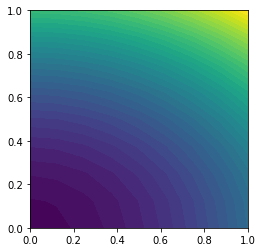

In [29]:
# Plot solution and mesh
plot(u)

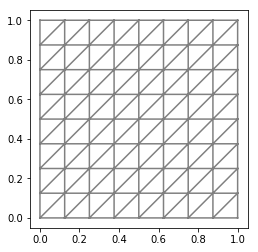

In [30]:
plot(mesh)

In [31]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.008235098073354806
error_max = 1.33226762955e-15


In [32]:
# Hold plot
interactive()